# Machine Learning 라이브러리

In [11]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

print(x_iris.shape, y_iris.shape)
print(x_iris[0], y_iris[0])
x_iris[:5]

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x,y = x_iris[:, :2], y_iris

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=33)

print(x_train.shape, y_train.shape)

scaler = preprocessing.StandardScaler().fit(x_train)
scaler

(112, 2) (112,)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ','-'))
df = pd.read_csv(filename,parse_dates=['start date'],dayfirst=True)

In [25]:
df.columns

Index(['year', 'tournament', 'start date', 'type', 'surface', 'draw',
       'atp points', 'atp ranking', 'tournament prize money', 'round',
       'opponent', 'ranking', 'score', 'stats link', 'tournament.1',
       'tournament round', 'time', 'winner', 'player1 name',
       'player1 nationality', 'player1 aces', 'player1 double faults',
       'player1 1st serves in', 'player1 1st serves total',
       'player1 1st serve points won', 'player1 1st serve points total',
       'player1 2nd serve points won', 'player1 2nd serve points total',
       'player1 break points won', 'player1 break points total',
       'player1 service games played', 'player1 1st serve return points won',
       'player1 1st serve return points total',
       'player1 2nd serve return points won',
       'player1 2nd serve return points total',
       'player1 break points converted won',
       'player1 break points converted total', 'player1 return games played',
       'player1 total service points won',
 

Roger Federer has won 82% of his ATP matches.


Text(0, 0.5, 'Proportion of double faults per match.')

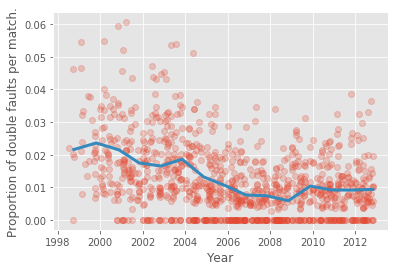

In [26]:
df['win'] = df['winner'] == player
print(("{player} has won {vic:.0f}% "
       "of his ATP matches.").format(player=player, vic=100*df['win'].mean()))

date = pd.to_datetime(df['start date'])

df['dblfaults'] = (df['player1 double faults']/df['player1 total points total'])
df['dblfaults'].tail()
df['dblfaults'].describe()

df.groupby('surface')['win'].mean()
gb = df.groupby('year')

plt.style.use('ggplot')

plt.plot_date(date, df['dblfaults'],alpha=.25,lw=0)
plt.plot_date(gb['start date'].max(), gb['dblfaults'].mean(),'-',lw=3)

plt.xlabel('Year')
plt.ylabel('Proportion of double faults per match.')

In [35]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

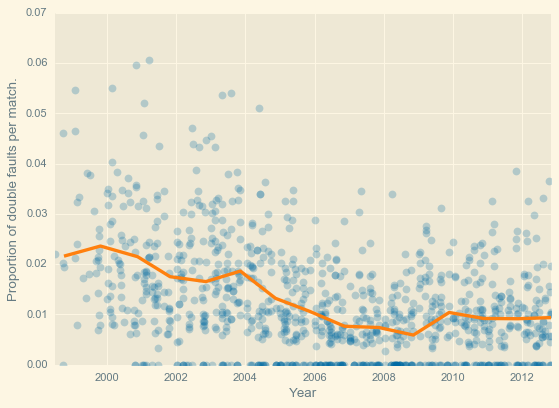

In [43]:
plt.plot_date(date, df['dblfaults'],alpha=.25,lw=0)
plt.plot_date(gb['start date'].max(), gb['dblfaults'].mean(),'-',lw=3)

plt.xlabel('Year')
plt.ylabel('Proportion of double faults per match.')

plt.style.use('tableau-colorblind10')
    

    

##  z-test

In [45]:
import numpy as np
import scipy.stats as st
import scipy.special as sp

n = 100
h = 61
q = .5

xbar = float(h)/n

z = (xbar -q) * np.sqrt(n / (q*(1-q)))
z


2.1999999999999997

In [47]:
pval = 2*(1-st.norm.cdf(z))
pval

0.02780689502699718

## Bayesian method

(0, 9.238743259089906)

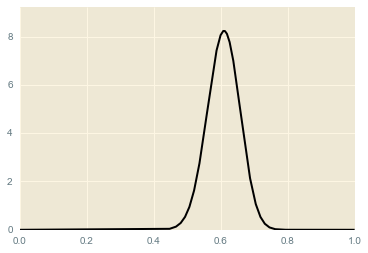

In [51]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

posterior = lambda n, h, q: ((n+1) * st.binom(n,q).pmf(h))

n=100
h=61
q = np.linspace(0., 1., 1000)
d = posterior(n,h,q)
plt.plot(q,d,'-k')
plt.ylim(0, d.max(0)+1)

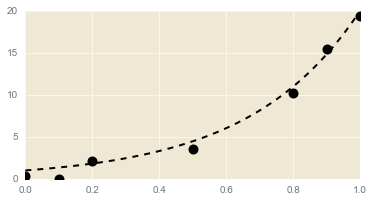

In [69]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pylab as plt

%matplotlib inline

f = lambda x: np.exp(3*x)
x_tr = np.linspace(0.,2,200)
y_tr = f(x_tr)

#plt.plot(x_tr, y_tr)

x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))

plt.figure(figsize=(6,3))
plt.plot(x_tr[:100], y_tr[:100], '--k')
plt.plot(x,y, 'ok', ms=10)

Text(0.5, 1.0, 'Linear regression')

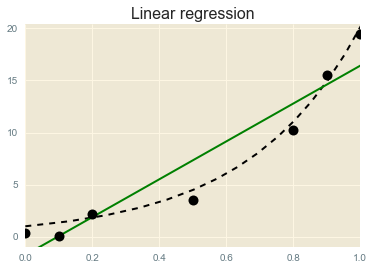

In [73]:
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_lr = lr.predict(x_tr[:, np.newaxis])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x,y,'ok', ms=10)
plt.xlim(0,1)
plt.ylim(y.min()-1, y.max()+1)
plt.title("Linear regression")

#### 방데르몬드(numpy에 들어가 있음)

In [77]:
for i,j in zip([2,5], ['-','.']):
    print(i,j)

2 -
5 .


24.67 -6.49 0.00
26.32 -14.81 8.18 0.00
-533.30 1315.57 -1081.28 344.64 -26.50 0.00


Text(0.5, 1.0, 'Linear regression')

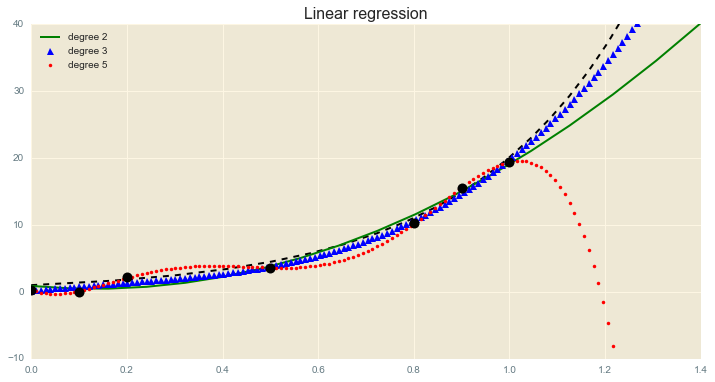

In [84]:
lrp = lm.LinearRegression()
plt.figure(figsize=(12,6))
plt.plot(x_tr, y_tr, '--k')
for deg, s in zip([2,3, 5], ['g-', 'b^', 'r.']):
    lrp.fit(np.vander(x, deg+1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, s, label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x,y, 'ok', ms=10)
plt.title("Linear regression")


-533.30 1315.57 -1081.28 344.64 -26.50 0.00
-533.30 1315.57 -1081.28 344.64 -26.50 0.00
-533.30 1315.57 -1081.28 344.64 -26.50 0.00


Text(0.5, 1.0, 'Ridge regression')

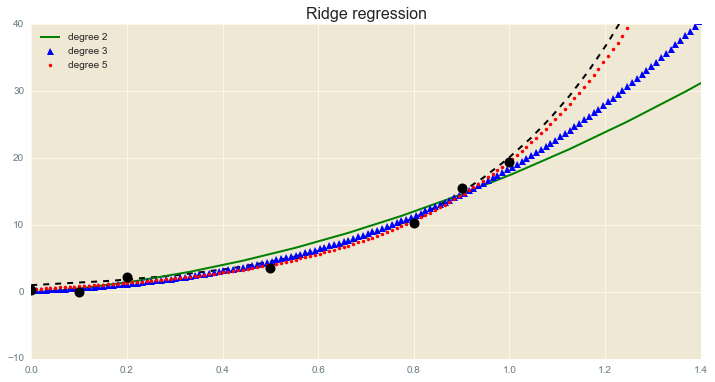

In [89]:
ridge = lm.RidgeCV()
plt.figure(figsize=(12,6))
plt.plot(x_tr, y_tr, '--k')

for deg , s in zip([2,3,5], ['g-','b^', 'r.' ]):
    ridge.fit(np.vander(x, deg+1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_ridge, s, label='degree '+str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x,y, 'ok', ms=10)
plt.title("Ridge regression")
